In [1]:
# Зависимости
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.metrics import mean_squared_error, f1_score

In [2]:
# Генерируем уникальный seed
my_code = "Sokolov"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [3]:
# Читаем данные из файла
example_data = pd.read_csv("datasets/Fish.csv")

In [4]:
example_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# Определим размер валидационной и тестовой выборок
val_test_size = round(0.2*len(example_data))
print(val_test_size)

32


In [6]:
# Создадим обучающую, валидационную и тестовую выборки
random_state = my_seed
train_val, test = train_test_split(example_data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [7]:
# Значения в числовых столбцах преобразуем к отрезку [0,1].
# Для настройки скалировщика используем только обучающую выборку.
num_columns = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

ct = ColumnTransformer(transformers=[('numerical', MinMaxScaler(), num_columns)], remainder='passthrough')
ct.fit(train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 ['Weight', 'Length1', 'Length2', 'Length3',
                                  'Height', 'Width'])])

In [8]:
# Преобразуем значения, тип данных приводим к DataFrame
sc_train = pd.DataFrame(ct.transform(train))
sc_test = pd.DataFrame(ct.transform(test))
sc_val = pd.DataFrame(ct.transform(val))

In [9]:
# Устанавливаем названия столбцов
column_names = num_columns + ['Species']
sc_train.columns = column_names
sc_test.columns = column_names
sc_val.columns = column_names

In [10]:
sc_train

,Weight,Length1,Length2,Length3,Height,Width,Species
0,0.065303,0.237113,0.244186,0.248188,0.229623,0.353434,Perch
1,0.1594,0.369072,0.370155,0.36413,0.315271,0.46338,Perch
2,0.498149,0.540206,0.542636,0.557971,0.582082,0.778924,Whitefish
3,0.021391,0.129897,0.127907,0.130435,0.121104,0.19514,Perch
4,0.096669,0.268041,0.273256,0.298913,0.3075,0.390829,Roach
...,...,...,...,...,...,...,...
90,1.0,1.0,1.0,1.0,0.456563,0.718369,Pike
91,0.357004,0.490722,0.496124,0.556159,0.777648,0.63739,Bream
92,0.109215,0.319588,0.321705,0.320652,0.273008,0.371547,Perch
93,0.087259,0.272165,0.277132,0.278986,0.244764,0.364005,Perch


In [11]:
# Задание №1 - анализ деревьев принятия решений в задаче регрессии
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# criterion : {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [12]:
# Выбираем 4 числовых переменных, три их них будут предикторами, одна - зависимой переменной
n = 4
labels = random.sample(num_columns, n)

y_label = labels[0]
x_labels = labels[1:]

print(x_labels)
print(y_label)

['Length1', 'Height', 'Length3']
Length2


In [13]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [14]:
x_train

,Length1,Height,Length3
0,0.237113,0.229623,0.248188
1,0.369072,0.315271,0.36413
2,0.540206,0.582082,0.557971
3,0.129897,0.121104,0.130435
4,0.268041,0.3075,0.298913
...,...,...,...
90,1.0,0.456563,1.0
91,0.490722,0.777648,0.556159
92,0.319588,0.273008,0.320652
93,0.272165,0.244764,0.278986


In [15]:
# Создайте 4 модели с различными критериями ветвления criterion: 'mse', 'friedman_mse', 'mae', 'poisson'.
# Решите получившуюся задачу регрессии с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры splitter, max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.
r_model1 = DecisionTreeRegressor(criterion='mse')
r_model2 = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model3 = DecisionTreeRegressor(criterion='mae', splitter='random', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model4 = DecisionTreeRegressor(criterion='poisson', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [16]:
r_models = []
r_models.append(r_model1)
r_models.append(r_model2)
r_models.append(r_model3)
r_models.append(r_model4)
for model in r_models:
    model.fit(x_train, y_train)

In [17]:
mses = []
for model in r_models:
    val_pred = model.predict(x_val)
    mse = mean_squared_error(y_val, val_pred)
    mses.append(mse)
    print(mse)

0.00043273672705967166
0.02546580618328126
0.02399922443062316
0.0002705338095667327


In [18]:
i_min = mses.index(min(mses))
best_r_model = r_models[i_min]
best_r_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'poisson',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [19]:
test_pred = best_r_model.predict(x_test)
mse = mean_squared_error(y_test, test_pred)
print(mse)

0.000488721380926626


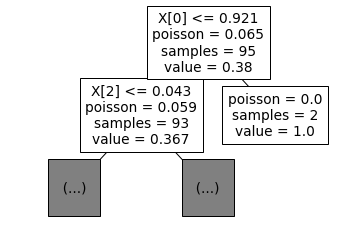

In [21]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(best_r_model, max_depth=1)
plt.show()

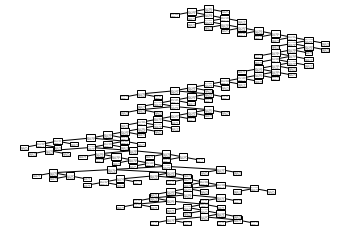

In [23]:
plot_tree(best_r_model)
plt.show()

In [24]:
# Задание №2 - анализ деревьев принятия решений в задаче классификации
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# criterion : {“gini”, “entropy”}, default=”gini”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [25]:
# Выбираем 2 числовых переменных, которые будут параметрами элементов набора данных
# Метка класса всегда 'Species'
n = 2
x_labels = random.sample(num_columns, n)
y_label = 'Species'

print(x_labels)
print(y_label)

['Width', 'Weight']
Species


In [26]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [27]:
x_train

,Width,Weight
0,0.353434,0.065303
1,0.46338,0.1594
2,0.778924,0.498149
3,0.19514,0.021391
4,0.390829,0.096669
...,...,...
90,0.718369,1.0
91,0.63739,0.357004
92,0.371547,0.109215
93,0.364005,0.087259


In [28]:
# Создайте 4 модели с различными критериями ветвления criterion : 'gini', 'entropy' и splitter : 'best', 'random'.
# Решите получившуюся задачу классификации с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.
d_model1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model3 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model4 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [29]:
d_models = []
d_models.append(d_model1)
d_models.append(d_model2)
d_models.append(d_model3)
d_models.append(d_model4)
for model in d_models:
    model.fit(x_train, y_train)

In [30]:
f1s = []
for model in d_models:
    val_pred = model.predict(x_val)
    f1 = f1_score(y_val, val_pred, average='weighted')
    f1s.append(f1)
    print(f1)

0.4253676470588236
0.4023809523809524
0.3690789473684211
0.4248129587803501


In [31]:
i_min = f1s.index(min(f1s))
best_d_model = d_models[i_min]
best_d_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
test_pred = best_d_model.predict(x_test)
f1 = f1_score(y_test, test_pred, average='weighted')
print(f1)

0.5129761904761905


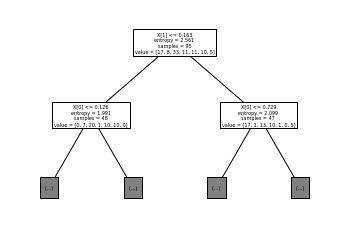

In [33]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(best_d_model, max_depth=1)
plt.show()

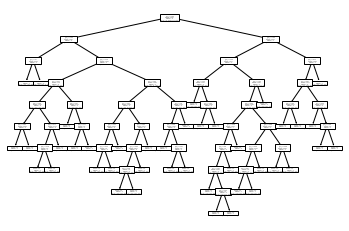

In [34]:
plot_tree(best_d_model)
plt.show()